In [1]:
# Import dependencies and file
# The dataset was obtained from HR Source.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
file_path = Path("HR_Analytics.Employee_Attrition.csv")


In [2]:
# Read csv file in to dataframe
employee_df = pd.read_csv(file_path)
employee_df.head()

,EMPID,Leaver(Y/N),Age,Gender,Race_Ethnicity,Job_Level,Annual_Salary,Position,CurrentPayGrade,TimewithCompany(yrs),DistancetoWork(miles),Hybrid/Remote,Dept_Name,Status,Salary_Max%
0,A0ZU,No,35,Female,Unspecified,Administrative Support Workers,20.8,Benefits and Payroll Coordinator,11,0.33,0.00,Remote,HR,Full Time,0.00
1,A0YO,Yes,31,Female,Unspecified,First/Mid-Level Officials and Managers,20.8,Camp Director,7,0.92,45.21,Hybrid,Outdoor Education - CTR,Full Time,0.00
2,A03Y,Yes,63,Male,Black or African American,Laborers and Helpers,"9,547.20",Guest Services and Maintenance Specialist - PT,13,3.58,41.49,Hybrid,Risk and Facilities,Part Time,0.21
3,A13D,Yes,29,Female,White,Sales Workers,"10,400.00",Customer Service Representative - PT,13,1.25,21.94,Hybrid,Badge & Sash,Part Time,0.23
4,A1FN,Yes,33,Female,Black or African American,Sales Workers,"10,400.00",Customer Service Representative - PT,13,7.50,0.00,Remote,Badge & Sash,Part Time,0.23


In [3]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EMPID                  364 non-null    object 
 1   Leaver(Y/N)            364 non-null    object 
 2   Age                    364 non-null    int64  
 3   Gender                 364 non-null    object 
 4   Race_Ethnicity         364 non-null    object 
 5   Job_Level              364 non-null    object 
 6   Annual_Salary          364 non-null    object 
 7   Position               364 non-null    object 
 8   CurrentPayGrade        364 non-null    int64  
 9   TimewithCompany(yrs)   364 non-null    float64
 10  DistancetoWork(miles)  364 non-null    float64
 11  Hybrid/Remote          364 non-null    object 
 12  Dept_Name              364 non-null    object 
 13  Status                 364 non-null    object 
 14  Salary_Max%            364 non-null    float64
dtypes: flo

In [4]:
employee_df['Dept_Name'].value_counts()

Membership                 86
Program Support            38
Member Care                30
Badge & Sash               25
Business Systems           24
Fund Development           21
Outdoor Education - CMM    17
Marketing                  17
Finance                    13
Risk and Facilities        12
Outdoor Education - CMW    10
Outdoor Property - CMM     10
Outdoor Program             9
HR                          9
Product Programs            8
Outdoor Property - CTR      8
Outdoor Property - CMW      7
Mission Delivery            7
IT                          6
Outdoor Education - CTR     5
CEO                         2
Name: Dept_Name, dtype: int64

In [5]:
employee_df['Dept_Name'].replace({"Outdoor Education - CMM":"Outdoor Education","Outdoor Education - CMW":"Outdoor Education","Outdoor Education - CTR":"Outdoor Education"}, inplace=True)

In [6]:
employee_df['Dept_Name'].value_counts()

Membership                86
Program Support           38
Outdoor Education         32
Member Care               30
Badge & Sash              25
Business Systems          24
Fund Development          21
Marketing                 17
Finance                   13
Risk and Facilities       12
Outdoor Property - CMM    10
HR                         9
Outdoor Program            9
Product Programs           8
Outdoor Property - CTR     8
Outdoor Property - CMW     7
Mission Delivery           7
IT                         6
CEO                        2
Name: Dept_Name, dtype: int64

In [7]:
employee_df['Dept_Name'].replace({"Outdoor Property - CMM":"Outdoor Property","Outdoor Property - CMW":"Outdoor Property","Outdoor Property - CTR":"Outdoor Property"}, inplace=True)

In [8]:
employee_df['Dept_Name'].replace({"Member Care":"Membership"}, inplace=True)

In [9]:
employee_df['Dept_Name'].value_counts()

Membership             116
Program Support         38
Outdoor Education       32
Outdoor Property        25
Badge & Sash            25
Business Systems        24
Fund Development        21
Marketing               17
Finance                 13
Risk and Facilities     12
HR                       9
Outdoor Program          9
Product Programs         8
Mission Delivery         7
IT                       6
CEO                      2
Name: Dept_Name, dtype: int64

In [10]:
employee_df.to_csv("Employee_Attrition.csv")

In [11]:
# Determine the number of employees that left the organization vs those that have stayed
employee_df['Leaver(Y/N)'].value_counts()

Yes    245
No     119
Name: Leaver(Y/N), dtype: int64

In [12]:
print("Percentage of Current Employees is {:.1f}% and of Former Employees is: {:.1f}%".format(
    employee_df[employee_df['Leaver(Y/N)'] == 'No'].shape[0] / employee_df.shape[0]*100,
    employee_df[employee_df['Leaver(Y/N)'] == 'Yes'].shape[0] / employee_df.shape[0]*100))

Percentage of Current Employees is 32.7% and of Former Employees is: 67.3%


Text(0, 0.5, '# of employees')

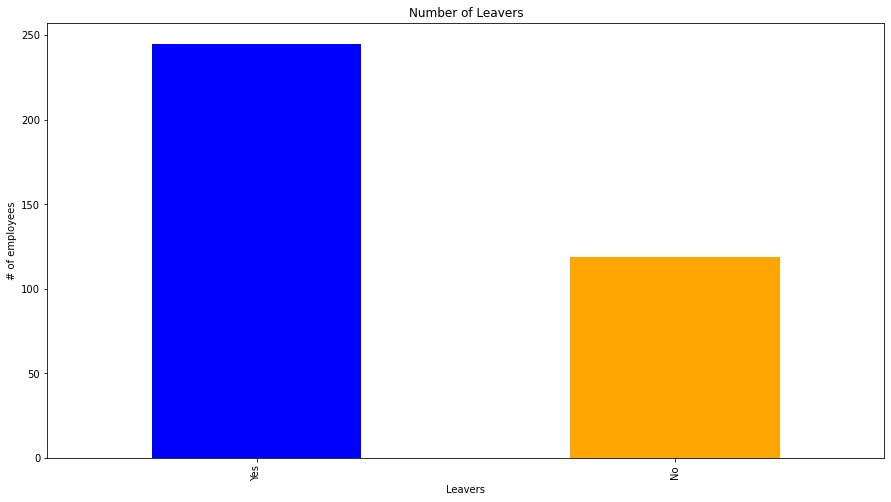

In [13]:
# Plot Leavers 
leavers = employee_df['Leaver(Y/N)'].value_counts()
leavers.plot(kind="bar",color=['blue','orange'],figsize=(15, 8))
plt.title("Number of Leavers")
plt.xlabel("Leavers")
plt.ylabel("# of employees")

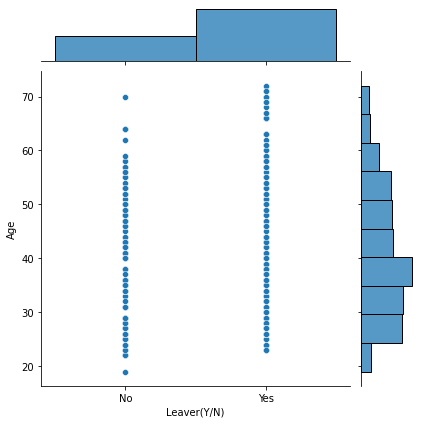

In [14]:
import seaborn as sns
# Plot Leavers by Age
sns.jointplot(x='Leaver(Y/N)',y='Age',data=employee_df)

Text(0, 0.5, '# of employees')

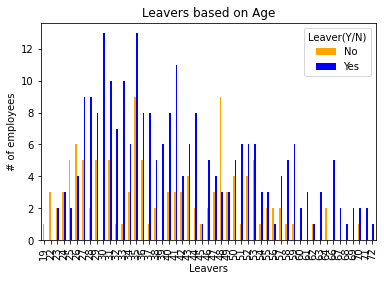

In [15]:
# Plot Leavers by Age
pd.crosstab(employee_df['Age'],employee_df['Leaver(Y/N)']).plot(kind='bar', color=['orange','blue'])
plt.title("Leavers based on Age")
plt.xlabel("Leavers")
plt.ylabel("# of employees")

Text(0, 0.5, '# of employees')

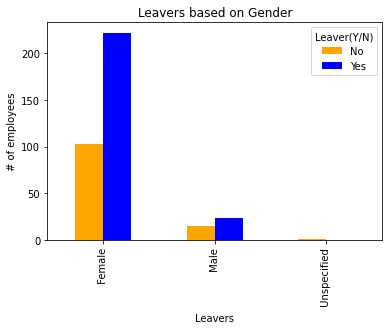

In [16]:
# Plot Leavers by Gender
pd.crosstab(employee_df['Gender'],employee_df['Leaver(Y/N)']).plot(kind='bar', color=['orange','blue'])
plt.title("Leavers based on Gender")
plt.xlabel("Leavers")
plt.ylabel("# of employees")

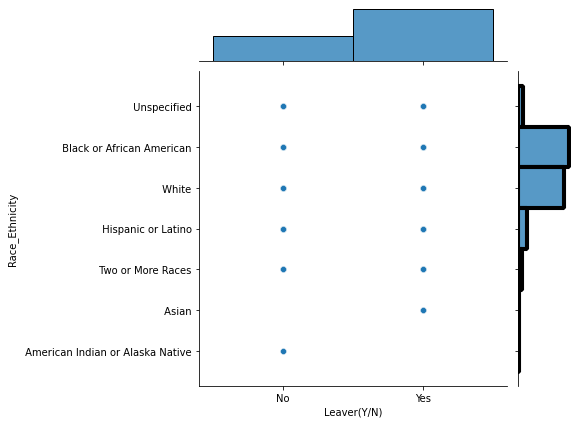

In [17]:
# Plot Leavers by Race_Ethnicity
sns.jointplot(x='Leaver(Y/N)',y='Race_Ethnicity',kind = "scatter",data=employee_df)
# pd.crosstab(employee_df['Race_Ethnicity'],employee_df['Stay/Left']).plot(kind='bar', color=['orange','blue'])
# plt.title("Leavers based on Daily Rate")
# plt.xlabel("Leavers")
# plt.ylabel("# of employees")
# plt.legend(["Stay","Left"])

Text(0, 0.5, '# of employees')

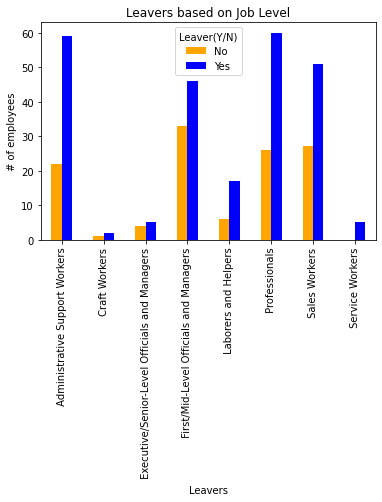

In [18]:
# Plot Leavers by Job_Level
pd.crosstab(employee_df['Job_Level'],employee_df['Leaver(Y/N)']).plot(kind='bar', color=['orange','blue'])
plt.title("Leavers based on Job Level")
plt.xlabel("Leavers")
plt.ylabel("# of employees")
# plt.legend(["Stay","Left"])

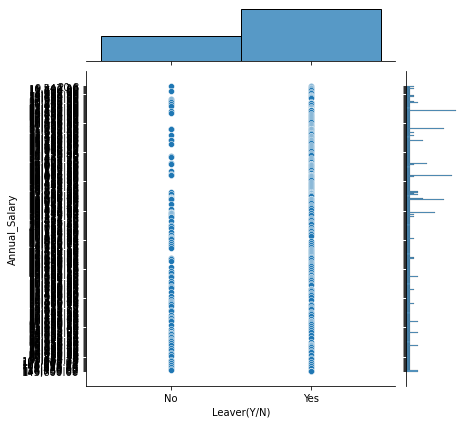

In [19]:
# Plot Leavers by Annual_Salary
sns.jointplot(x='Leaver(Y/N)',y='Annual_Salary',kind = "scatter",data=employee_df)
# pd.crosstab(employee_df['Annual_Salary'],employee_df['Leaver(Y/N)']).plot(kind='bar', color=['orange','blue'])
# plt.title("Leavers based on Annual Salary")
# plt.xlabel("Leavers")
# plt.ylabel("# of employees")
# plt.legend(["Stay","Left"])

Text(0, 0.5, '# of employees')

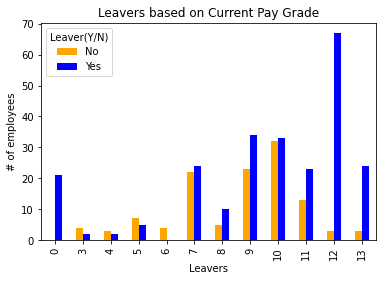

In [20]:
# Plot Leavers by Current Pay Grade
pd.crosstab(employee_df['CurrentPayGrade'],employee_df['Leaver(Y/N)']).plot(kind='bar', color=['orange','blue'])
plt.title("Leavers based on Current Pay Grade")
plt.xlabel("Leavers")
plt.ylabel("# of employees")
# plt.legend(["Stay","Left"])

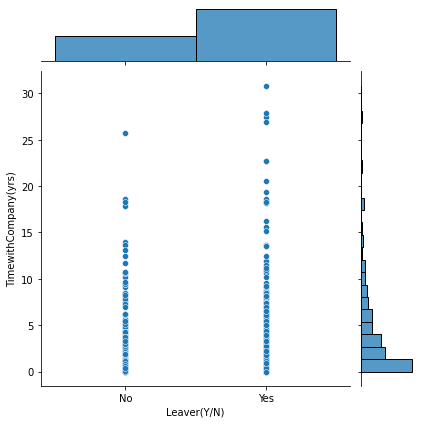

In [21]:
# Plot Leavers by Total Working Years
sns.jointplot(x='Leaver(Y/N)',y='TimewithCompany(yrs)',kind = "scatter",data=employee_df)
# pd.crosstab(employee_df['TotalWorkingYears'],employee_df['Stay/Left']).plot(kind='bar', color=['orange','blue'])
# plt.title("Leavers based on Total Working Years")
# plt.xlabel("Leavers")
# plt.ylabel("# of employees")
# plt.legend(["Stay","Left"])

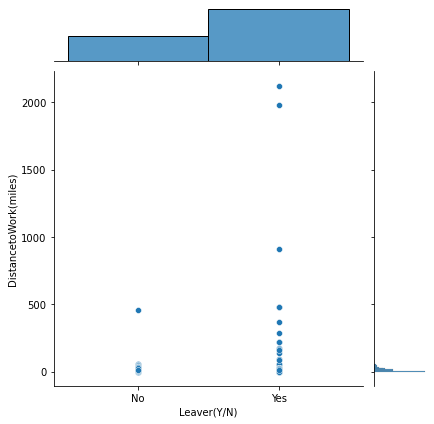

In [22]:
# Plot Leavers by Distance From Home
sns.jointplot(x='Leaver(Y/N)',y='DistancetoWork(miles)',kind = "scatter",data=employee_df)
# pd.crosstab(employee_df['DistanceFromHome'],employee_df['Stay/Left']).plot(kind='bar', color=['orange','blue'])
# plt.title("Leavers based on Distance From Home")
# plt.xlabel("Leavers")
# plt.ylabel("# of employees")
# plt.legend(["Stay","Left"])

Text(0, 0.5, '# of employees')

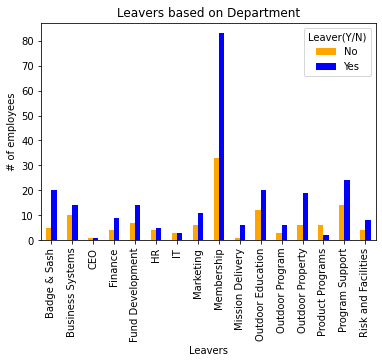

In [23]:
# Plot Leavers by Department
pd.crosstab(employee_df['Dept_Name'],employee_df['Leaver(Y/N)']).plot(kind='bar', color=['orange','blue'])
plt.title("Leavers based on Department")
plt.xlabel("Leavers")
plt.ylabel("# of employees")
# plt.legend(["Stay","Left"])

Text(0, 0.5, '# of employees')

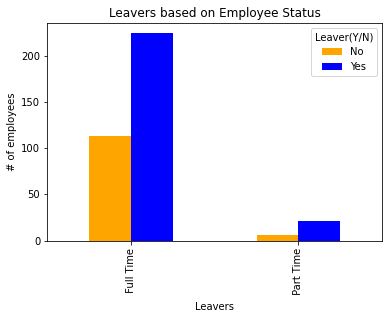

In [24]:
# Plot Leavers by Employee Status
pd.crosstab(employee_df['Status'],employee_df['Leaver(Y/N)']).plot(kind='bar', color=['orange','blue'])
plt.title("Leavers based on Employee Status")
plt.xlabel("Leavers")
plt.ylabel("# of employees")
# plt.legend(["Stay","Left"])

Text(0, 0.5, '# of employees')

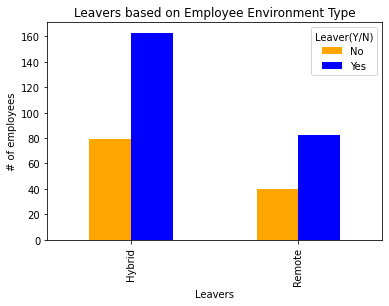

In [25]:
# Plot Leavers by Employee Environment Type
pd.crosstab(employee_df['Hybrid/Remote'],employee_df['Leaver(Y/N)']).plot(kind='bar', color=['orange','blue'])
plt.title("Leavers based on Employee Environment Type")
plt.xlabel("Leavers")
plt.ylabel("# of employees")
# plt.legend(["Stay","Left"])

Text(0, 0.5, '# of employees')

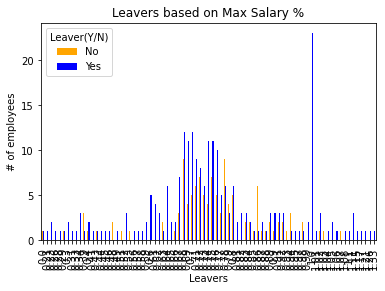

In [26]:
# Plot Leavers by Max Salary %
pd.crosstab(employee_df['Salary_Max%'],employee_df['Leaver(Y/N)']).plot(kind='bar', color=['orange','blue'])
plt.title("Leavers based on Max Salary %")
plt.xlabel("Leavers")
plt.ylabel("# of employees")
# plt.legend(["Stay","Left"])

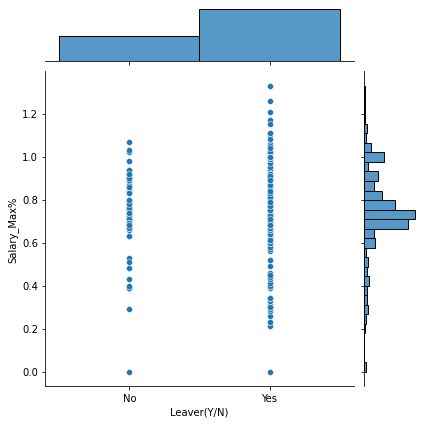

In [27]:
# Plot Leavers by Year at Company
sns.jointplot(x='Leaver(Y/N)',y='Salary_Max%',kind = "scatter",data=employee_df)

# pd.crosstab(employee_df['YearsAtCompany'],employee_df['Stay/Left']).plot(kind='bar', color=['orange','blue'])
# plt.title("Leavers based on Years at Company")
# plt.xlabel("Leavers")
# plt.ylabel("# of employees")
# plt.legend(["Stay","Left"])

In [28]:
# Find correlations with the target and sort
employee_df_trans = employee_df.copy()
employee_df_trans['Target'] = employee_df_trans['Leaver(Y/N)'].apply(
    lambda x: 0 if x == 'No' else 1)
employee_df_trans = employee_df_trans.drop(
    ['Leaver(Y/N)', 'EMPID'], axis=1)
correlations = employee_df_trans.corr()['Target'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(3))
print('\nMost Negative Correlations:\n', correlations.head(3))

Most Positive Correlations:
 Age                0.081402
CurrentPayGrade    0.112285
Target             1.000000
Name: Target, dtype: float64

Most Negative Correlations:
 Salary_Max%              0.019274
TimewithCompany(yrs)     0.025222
DistancetoWork(miles)    0.080063
Name: Target, dtype: float64


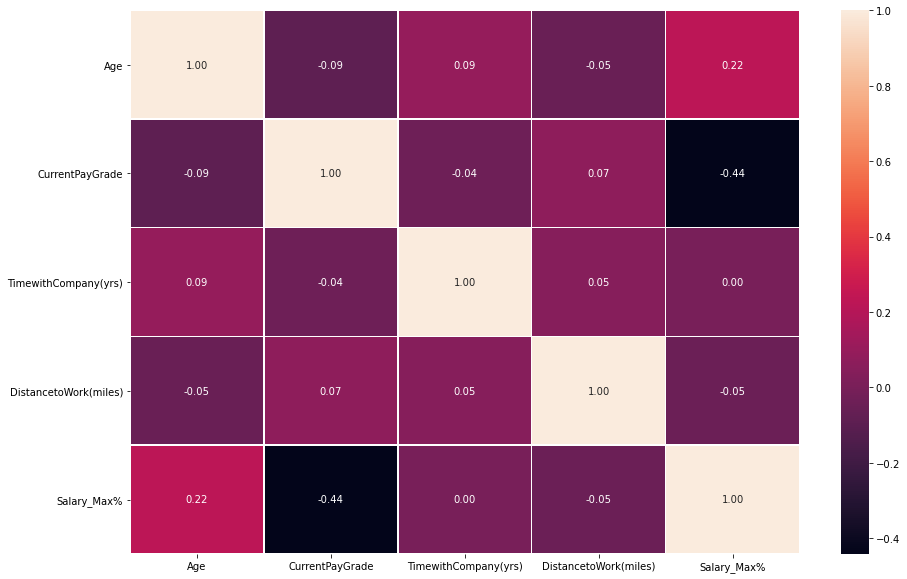

In [29]:
corr_matrix=employee_df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [35]:
# Create outcome to new dataframe and drop target column and unnecessary "EMPID" column
emp_data = employee_df.drop(["Leaver(Y/N)","EMPID","Status"], axis=1)
emp_data.head()

,Age,Gender,Race_Ethnicity,Job_Level,Annual_Salary,Position,CurrentPayGrade,TimewithCompany(yrs),DistancetoWork(miles),Hybrid/Remote,Dept_Name,Salary_Max%
0,35,Female,Unspecified,Administrative Support Workers,20.8,Benefits and Payroll Coordinator,11,0.33,0.00,1,HR,0.00
1,31,Female,Unspecified,First/Mid-Level Officials and Managers,20.8,Camp Director,7,0.92,45.21,0,Outdoor Education,0.00
2,63,Male,Black or African American,Laborers and Helpers,"9,547.20",Guest Services and Maintenance Specialist - PT,13,3.58,41.49,0,Risk and Facilities,0.21
3,29,Female,White,Sales Workers,"10,400.00",Customer Service Representative - PT,13,1.25,21.94,0,Badge & Sash,0.23
4,33,Female,Black or African American,Sales Workers,"10,400.00",Customer Service Representative - PT,13,7.50,0.00,1,Badge & Sash,0.23


In [36]:
# Create target values to new dataframe and convert to numerical data
target = employee_df["Leaver(Y/N)"].values

In [37]:
#Convert columns with 2 or less unique values
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Label encoding the 'Status' column
emp_data['Hybrid/Remote'] = LabelEncoder().fit_transform(emp_data['Hybrid/Remote'])
emp_data['Hybrid/Remote'].value_counts()

0    242
1    122
Name: Hybrid/Remote, dtype: int64

In [38]:
# Converting output labels to 0 and 1
y = LabelEncoder().fit_transform(target)
y

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,

In [39]:
# Convert remaining categorical data to numerical in dataframe
X = pd.get_dummies(emp_data,drop_first=True)
print(X.columns)
X.head()

Index(['Age', 'CurrentPayGrade', 'TimewithCompany(yrs)',
       'DistancetoWork(miles)', 'Hybrid/Remote', 'Salary_Max%', 'Gender_ Male',
       'Gender_ Unspecified', 'Race_Ethnicity_ Asian',
       'Race_Ethnicity_ Black or African American',
       ...
       'Dept_Name_IT', 'Dept_Name_Marketing', 'Dept_Name_Membership',
       'Dept_Name_Mission Delivery', 'Dept_Name_Outdoor Education',
       'Dept_Name_Outdoor Program', 'Dept_Name_Outdoor Property',
       'Dept_Name_Product Programs', 'Dept_Name_Program Support',
       'Dept_Name_Risk and Facilities'],
      dtype='object', length=453)


,Age,CurrentPayGrade,TimewithCompany(yrs),DistancetoWork(miles),Hybrid/Remote,Salary_Max%,Gender_ Male,Gender_ Unspecified,Race_Ethnicity_ Asian,Race_Ethnicity_ Black or African American,...,Dept_Name_IT,Dept_Name_Marketing,Dept_Name_Membership,Dept_Name_Mission Delivery,Dept_Name_Outdoor Education,Dept_Name_Outdoor Program,Dept_Name_Outdoor Property,Dept_Name_Product Programs,Dept_Name_Program Support,Dept_Name_Risk and Facilities
0,35,11,0.33,0.00,1,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31,7,0.92,45.21,0,0.00,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,63,13,3.58,41.49,0,0.21,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,29,13,1.25,21.94,0,0.23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,13,7.50,0.00,1,0.23,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Scale the data
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)
print(X_scaled_data[0:10])

[[-0.51054851  0.59168839 -0.77830297 ... -0.14990634 -0.34141531
  -0.18463724]
 [-0.84404273 -0.65685987 -0.66419062 ... -0.14990634 -0.34141531
  -0.18463724]
 [ 1.82391107  1.21596252 -0.149718   ... -0.14990634 -0.34141531
   5.4160256 ]
 ...
 [ 0.15643994  1.21596252  2.75144344 ... -0.14990634 -0.34141531
  -0.18463724]
 [-0.17705428  1.21596252 -0.37407448 ... -0.14990634 -0.34141531
  -0.18463724]
 [-0.84404273  1.21596252 -0.50365969 ... -0.14990634 -0.34141531
  -0.18463724]]


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y, test_size=.25, random_state=5, stratify=target)

print("Number of X_train transactions: ", X_train.shape)
print("Number of y_train transactions: ", y_train.shape)
print("Number of X_test transactions: ", X_test.shape)
print("Number of y_test transactions: ", y_test.shape)

Number of X_train transactions:  (273, 453)
Number of y_train transactions:  (273,)
Number of X_test transactions:  (91, 453)
Number of y_test transactions:  (91,)


In [ ]:
# # Import Dependencies to convert categorical data, Algorithm and ProofType, into numerical data
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


# # Label encoding the 'Leaver?' column
# employee_df['Leaver(Y/N)'] = LabelEncoder().fit_transform(employee_df['Leaver(Y/N)'])
# employee_df['Leaver(Y/N)'].value_counts()

In [ ]:
# # Import Dependencies to convert categorical data, Algorithm and ProofType, into numerica data
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# # Label encoding the 'Gender' column
# employee_df['Gender'] = LabelEncoder().fit_transform(employee_df['Gender'])
# employee_df['Gender'].value_counts()

In [ ]:
# # Label encoding the 'Department' column
# employee_df['Dept_Name'] = LabelEncoder().fit_transform(employee_df['Dept_Name'])
# employee_df['Dept_Name'].value_counts()

In [ ]:
# # Label encoding the 'MaritalStatus' column
# employee_df['Age'] = LabelEncoder().fit_transform(employee_df['Age'])
# employee_df['Age'].value_counts()

In [ ]:
# # Label encoding the 'Business Travel' column
# employee_df['Job_Level'] = LabelEncoder().fit_transform(employee_df['Job_Level'])
# employee_df['Job_Level'].value_counts()

In [ ]:
# # Label encoding the 'Education Field' column
# employee_df['Annual_Salary'] = LabelEncoder().fit_transform(employee_df['Annual_Salary'])
# employee_df['Annual_Salary'].value_counts()

In [ ]:
# # Label encoding the 'Job Role' column
# employee_df['CurrentPayGrade'] = LabelEncoder().fit_transform(employee_df['CurrentPayGrade'])
# employee_df['CurrentPayGrade'].value_counts()

In [ ]:
# # Label encoding the 'Over Time' column
# employee_df['TimewithCompany(yrs)'] = LabelEncoder().fit_transform(employee_df['TimewithCompany(yrs)'])
# employee_df['TimewithCompany(yrs)'].value_counts()

In [ ]:
# # Label encoding the 'Over 18' column
# employee_df['DistancetoWork(miles)'] = LabelEncoder().fit_transform(employee_df['DistancetoWork(miles)'])
# employee_df['DistancetoWork(miles)'].value_counts()

In [ ]:
# # Label encoding the 'Over 18' column
# employee_df['Salary_Max%'] = LabelEncoder().fit_transform(employee_df['Salary_Max%'])
# employee_df['Salary_Max%'].value_counts()

In [ ]:
# # Label encoding the 'Over 18' column
# employee_df['Race_Ethnicity'] = LabelEncoder().fit_transform(employee_df['Race_Ethnicity'])
# employee_df['Race_Ethnicity'].value_counts()

In [ ]:
# employee_clean=employee_df.drop(['EMPID'], axis = 1)

# employee_clean

In [ ]:
# employee_clean.shape

In [ ]:
# target = employee_clean["Leaver(Y/N)"].copy()
# target.head()

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [43]:
from sklearn import model_selection

acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
results_df = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    results_df.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
results_df.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,73.61,7.28,70.67,6.43
2,SVM,65.03,11.98,68.52,6.02
4,Decision Tree Classifier,60.43,10.15,66.26,8.60
3,KNN,59.61,12.00,61.44,10.34
5,Gaussian NB,59.36,6.69,53.80,8.03
0,Logistic Regression,58.18,11.94,56.08,8.82


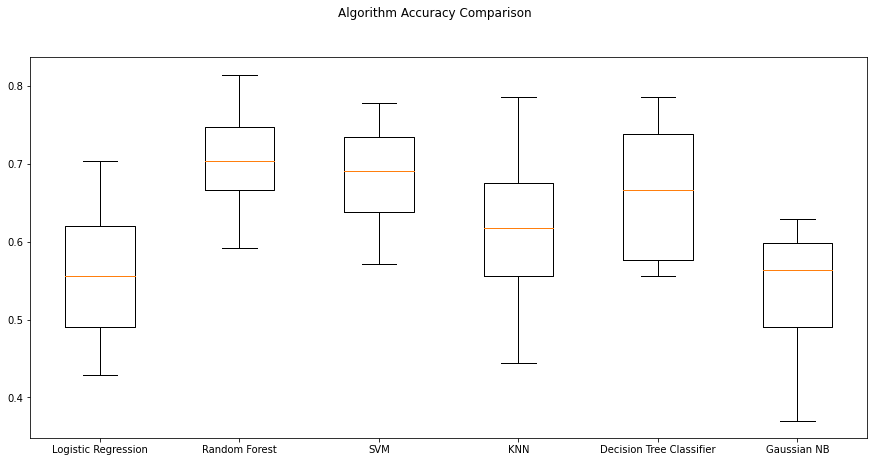

In [44]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

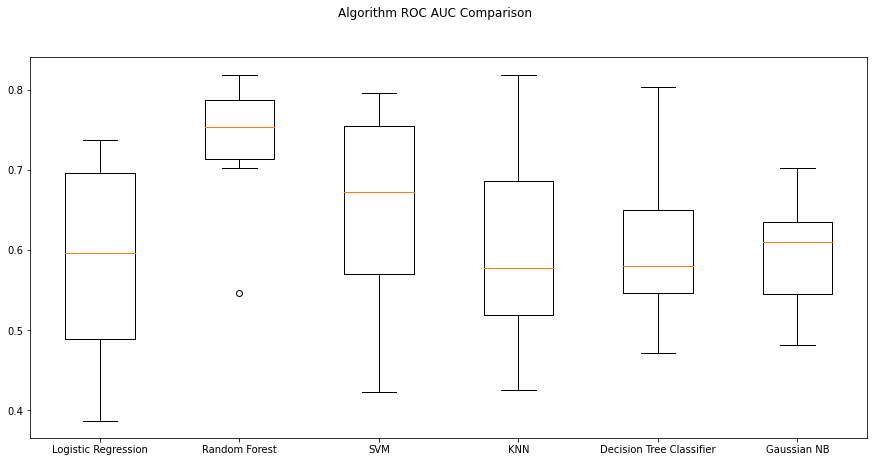

In [45]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

In [46]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(kernel='linear')

In [47]:
from sklearn import *

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=7, shrinking=True,
    tol=0.001, verbose=False)

SVC(gamma='auto', kernel='linear', random_state=7)

In [48]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.637


In [49]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.40      0.20      0.27        30
           1       0.68      0.85      0.76        61

    accuracy                           0.64        91
   macro avg       0.54      0.53      0.51        91
weighted avg       0.59      0.64      0.60        91



In [50]:
# Train the Logistic Regression model on the unscaled data and print the model score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

In [51]:
# Fit the training model using the training data
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
# Print the training and test scores
print(f"Training Score: {model.score(X_train, y_train)}")
print(f"Testing Score: {model.score(X_test, y_test)}")

Training Score: 0.9853479853479854
Testing Score: 0.6153846153846154


In [53]:
# Create Confusion Matrix of the predicted vs the actual outcomes
y_true = y_test
y_pred = model.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[ 4, 26],
       [ 9, 52]], dtype=int64)

In [54]:
# Create the Classification Report and compare
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.13      0.19        30
           1       0.67      0.85      0.75        61

    accuracy                           0.62        91
   macro avg       0.49      0.49      0.47        91
weighted avg       0.55      0.62      0.56        91



In [55]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)


In [56]:
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.6813186813186813


In [51]:
# Create Confusion Matrix of the predicted vs the actual outcomes
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = clf.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[ 7, 23],
       [ 6, 55]])

In [52]:
# Create the Classification Report and compare
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.23      0.33        30
           1       0.71      0.90      0.79        61

    accuracy                           0.68        91
   macro avg       0.62      0.57      0.56        91
weighted avg       0.65      0.68      0.64        91



In [53]:
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_split=8, n_estimators=175, random_state=7)
best params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 175}
best score: 0.7872319688109162
